Téléchargement des bibliothéques nécessaire pour notre étude de cas . 

In [5]:
library(StMoMo)
library(reliaR)
library(demography)
library(lifecontingencies)

Question 1 : Téléchargement des données pour le pays concerné (Danemark) . 

In [8]:
DenmarkMT<- hmd.mx(country ="DNK",username = "mohamedyahia.bourguiba@esprit.tn",password = "1621806965",label = "Denmark")

Warning message in hmd.mx(country = "DNK", username = "mohamedyahia.bourguiba@esprit.tn", :
"NAs introduced by coercion"


Question 2 : Rappeler les principales caractéristiques du modèle de Lee-Carter.

Modèle Lee-Carter avec la mèthode fit du package StMoMo en choisissant les plages d’âge et de période
On observant les paramètres du modèle sur toute la pèriode :

αx : une fonction unimodale décroissante pour les âges faibles inférieurs à 10 ans puis une forte croissante jusqu’à la fin de la vie ,c’est pourquoi notre plage commence  à 50ans jusqu’à 110ans pour des besoins d'études .

kt : cette fonction décroît sur toute la période mais en présentant des instabilités allant de 1876 jusqu'à 2019 et on a choisi cette periode spécifiques à cause des informations manquantes . 

Question 3 : Estimer les paramètres d’un modèle de Lee-Carter à partir des données historiques téléchargées .

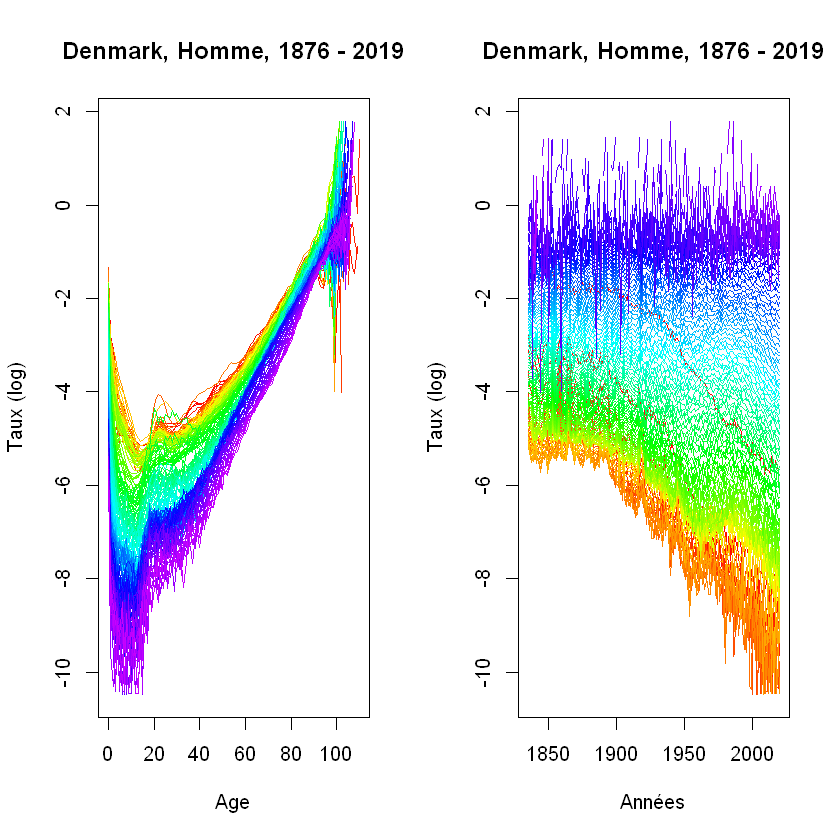

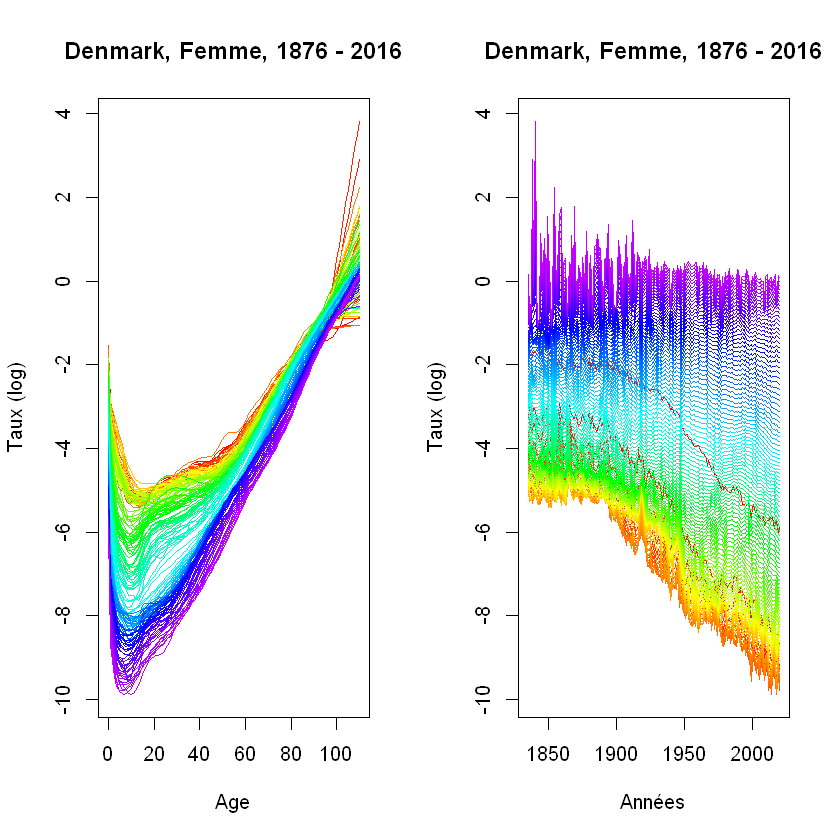

[1] "Denmark, Main Effects & Interactions, Homme 1876 - 2019"

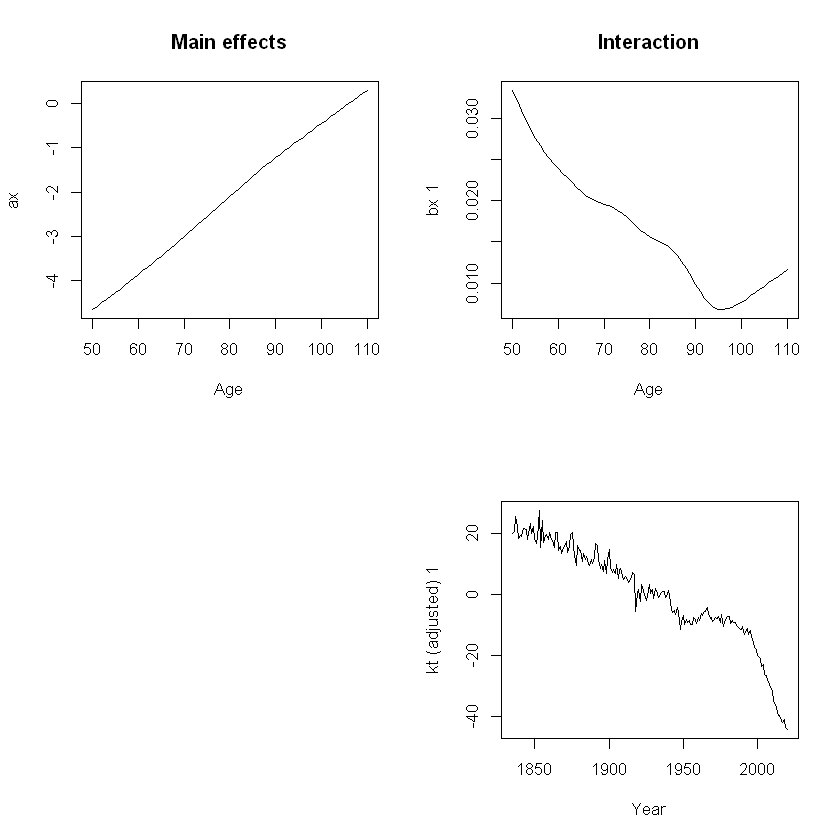

[1] "Denmark, Main Effects & Interactions, Femme 1876 - 2019"

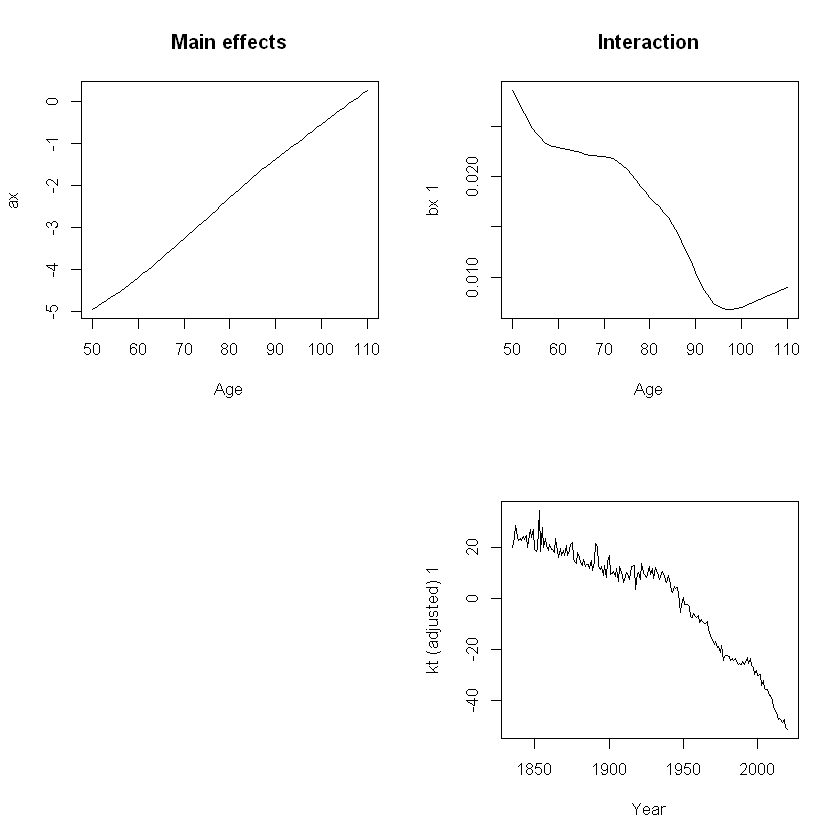

In [20]:
par(mfrow=c(1,2))
plot(DenmarkMT,series="male",datatype="rate", main="Denmark, Homme, 1876 - 2019",xlab="Age",ylab="Taux (log)") 
plot(DenmarkMT,series="male",datatype="rate", plot.type="time", main="Denmark, Homme, 1876 - 2019",xlab="Années",ylab="Taux (log)")
DenmarkMT.smth <- smooth.demogdata(DenmarkMT,method="mspline") 
ages.fit = 50:110 
denmarkMLcaMMI <- lca(DenmarkMT.smth ,series ="male" ,ages = ages.fit , max.age = 110, adjust="dt")
par(mfrow=c(1,2))
plot(DenmarkMT.smth,series="female",datatype="rate", main="Denmark, Femme, 1876 - 2016",xlab="Age",ylab="Taux (log)") 
plot(DenmarkMT.smth,series="female",datatype="rate", plot.type="time", main="Denmark, Femme, 1876 - 2016",xlab="Années",ylab="Taux (log)")
denmarkFLcaMMI <- lca(DenmarkMT.smth ,series ="female" ,ages = ages.fit , max.age = 110, adjust="dt") 

plot(denmarkFLcaMMI)
"Denmark, Main Effects & Interactions, Femme 1876 - 2019" 

plot(denmarkMLcaMMI)
"Denmark, Main Effects & Interactions, Homme 1876 - 2019" 
constLC <- function(ax, bx, kt, b0x, gc, wxt, ages) {
     c1 <- mean(kt[1, ], na.rm = TRUE)
     c2 <- sum(bx[, 1], na.rm = TRUE)
     list(ax = ax + c1 * bx, bx = bx / c2, kt = c2 * (kt - c1))}
age <- 50:98
annees <- 1835:2019
LC <- StMoMo(link = "log", staticAgeFun = TRUE, periodAgeFun = "NP", constFun = constLC)

Analyse des paramètres Pour Femme :
ax : la valeur moyenne des logs de la mortalité instantanné ( ln µ( x t, ) au cours du temps ) elle crois en fonction de l’age elle varie entre -5 et 0 .

bx indique la sensibilité de la mortalité instantanée par rapport à l’évolution générale de la mortalité. Si on se situe à partir de 55 ans, on constate que les âges les plus sensibles à l’évolution temporelle de la mortalité sont ceux entre 55 et 70 ans . On atteint en effet des stabilités sur ces tranches d’âges.

D’après la figure ci-dessus et comme kt indique l’évolution générale de la mortalité dans le temps ;
On constate pendant les années 1860 une forte croissance due à la Seconde guerre du Schleswig qui c'est déroulé pendant la même periode . 
On constate une tendance linéaire à la décroissance des entre 1940 et 2010 Cette tendance à la décroissance du paramètre k, qui devient négatif au cours de la période, associée à la positivité moyenne du paramètre β implique d’après la formule de Lee-Carter, une diminution des taux instantanés de mortalité. En conséquence, on assiste à une augmentation de la probabilité de la survie sur la période observée.


Analyse des paramètres Pour Homme :
ax : la valeur moyenne des logs de la mortalité instantanné ( ln µ( x t, ) au cours du temps ) elle crois en fonction de l’age elle varie entre -4 et 0 .

bx indique la sensibilité de la mortalité instantanée par rapport à l’évolution générale de la mortalité.  on se situe à partir de 55 ans .

D’après la figure ci-dessus et comme kt indique l’évolution générale de la mortalité dans le temps ;
On constate pendant les années 1860 une forte croissance due à la Seconde guerre du Schleswig qui c'est déroulé pendant la même periode . 
On constate une tendance linéaire à la décroissance des entre 1940 et 2010 Cette tendance à la décroissance du paramètre k, qui devient négatif au cours de la période, associée à la positivité moyenne du paramètre β implique d’après la formule de Lee-Carter, une diminution des taux instantanés de mortalité. En conséquence, on assiste à une augmentation de la probabilité de la survie sur la période observée.

StMoMo: Start fitting with gnm
Initialising
Running start-up iterations..
Running main iterations........
Done
StMoMo: Finish fitting with gnm
StMoMo: Start fitting with gnm
Initialising
Running start-up iterations..
Running main iterations.........
Done
StMoMo: Finish fitting with gnm


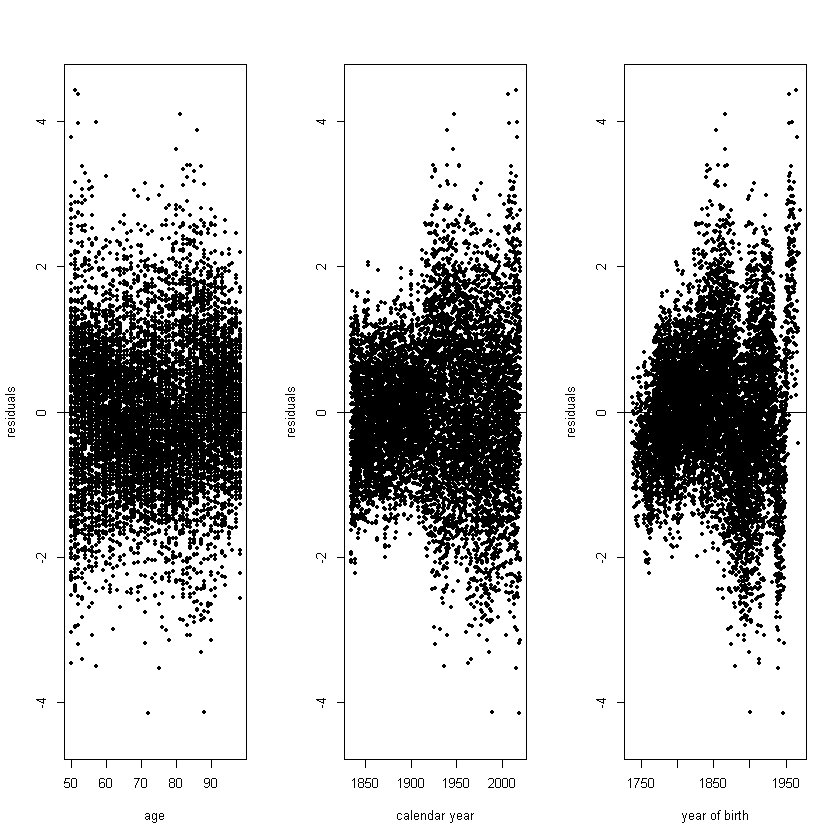

In [19]:
denmarkMFit<- fit(LC, data = denmarkMMoMo, ages.fit = age, years.fit = annees )
denmarkFFit<- fit(LC, data = denmarkFMoMo, ages.fit = age, years.fit = annees )
model_resM <- resid(denmarkMFit)
plot(model_resM)

Le résidus du modèle LCA Pour Homme .

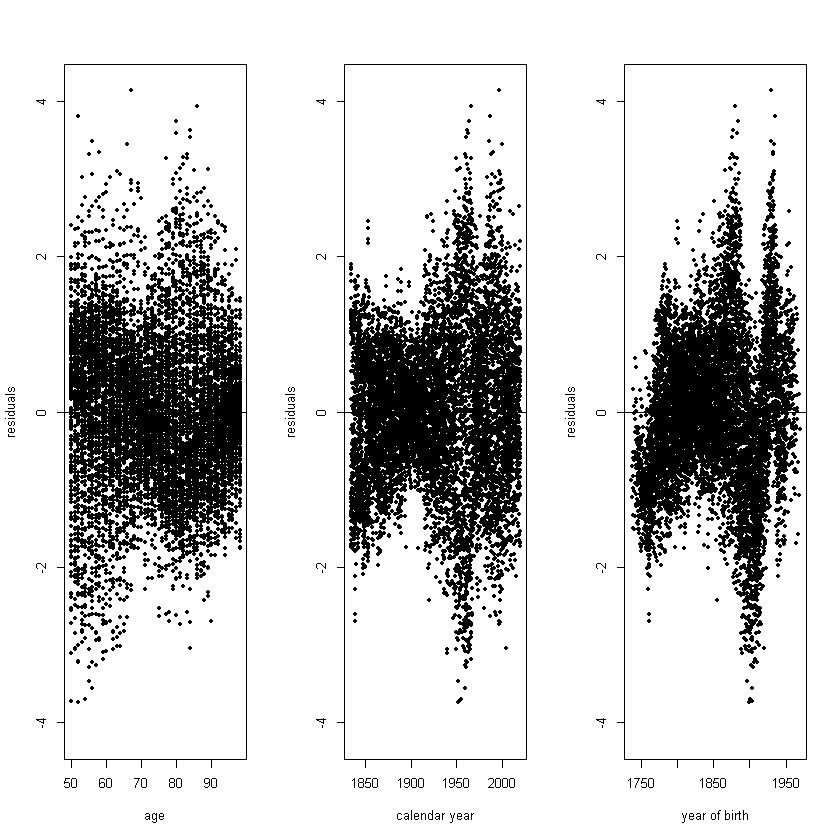

In [25]:
#Le résidus du modèle LCA Pour Femme .
model_resF <- resid(denmarkFFit)
plot(model_resF)

Le résidus du modèle LCA Pour Femme .

lorsque l’on effectue un ajustement par la méthode de Lee-Carter, on peut analyser la variance des résidus,
et confronter les observations à l’hypothèse d’homoscédasticité.

Question 4 :

Le modèle à deux facteurs Cairns-Blake-Dowd (CBD) est l’une des variantes les plus importantes du modèle Lee-Carter. Le modèle du CDB repose sur la linéarité de la logit des probabilités de décès d’un an à des âges plus avancés. Plus précisément, il suppose que, pour une année donnée, la logit de la probabilité de mort d’un an est une fonction linéaire de l’âge, et traite les paramètres d’interception et de pente à travers les années comme des processus stochastiques. envisager trois extensions du modèle original de CBD en incorporant des combinaisons d’un terme quadratique d’âge et d’un terme d’effet de cohorte. Le modèle Plat présente les caractéristiques combinées du
Le CBD et les modèles Lee-Carter pour produire un modèle adapté aux tranches d’âge complètes et saisir l’effet de cohorte

Question 5 : 

Estimation des paramètres du modèle de CBD à partir des données historiques téléchargées.

Mortality data for Denmark
    Series:  male
    Years: 1835 - 2020
    Ages:  0 - 110
    Exposure:  central 
StMoMo: Start fitting with gnm


Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


StMoMo: Finish fitting with gnm


[1] "Denmark, Main CBA Model, Homme 50 ans - 98 ans"

Mortality data for Denmark
    Series:  female
    Years: 1835 - 2020
    Ages:  0 - 110
    Exposure:  central 
StMoMo: Start fitting with gnm


Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


StMoMo: Finish fitting with gnm


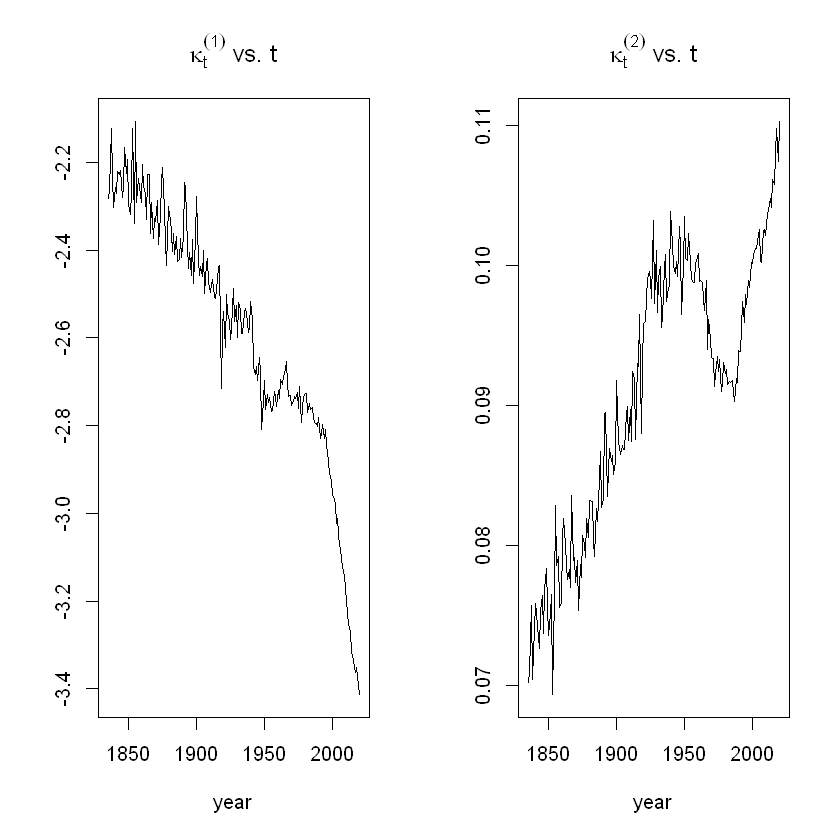

[1] "Denmark, Main CBA Model, Femme 50 ans - 98 ans"

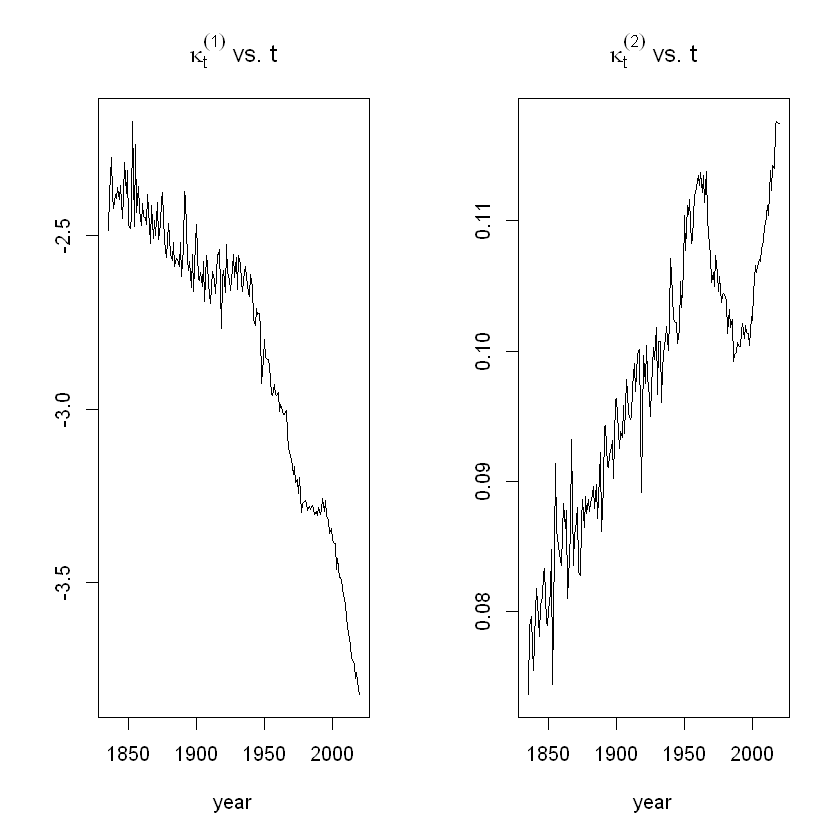

In [27]:
denmarkMMoMo <- StMoMoData(DenmarkMT, series = "male")
summary(denmarkMMoMo)
CBD <- cbd()
CBDMfit <- fit(CBD, data =central2initial(denmarkMMoMo) , ages.fit = 50:98)
plot(CBDMfit, parametricbx = FALSE)
"Denmark, Main CBA Model, Homme 50 ans - 98 ans" 
denmarkFMoMo <- StMoMoData(DenmarkMT, series = "female")
summary(denmarkFMoMo)
CBD <- cbd()
CBDFfit <- fit(CBD, data =central2initial(denmarkFMoMo) , ages.fit = 50:98)
plot(CBDFfit, parametricbx = FALSE)
"Denmark, Main CBA Model, Femme 50 ans - 98 ans" 

Question 6 : les log taux de mortalité estimés par le  modèle Lee-Carter.

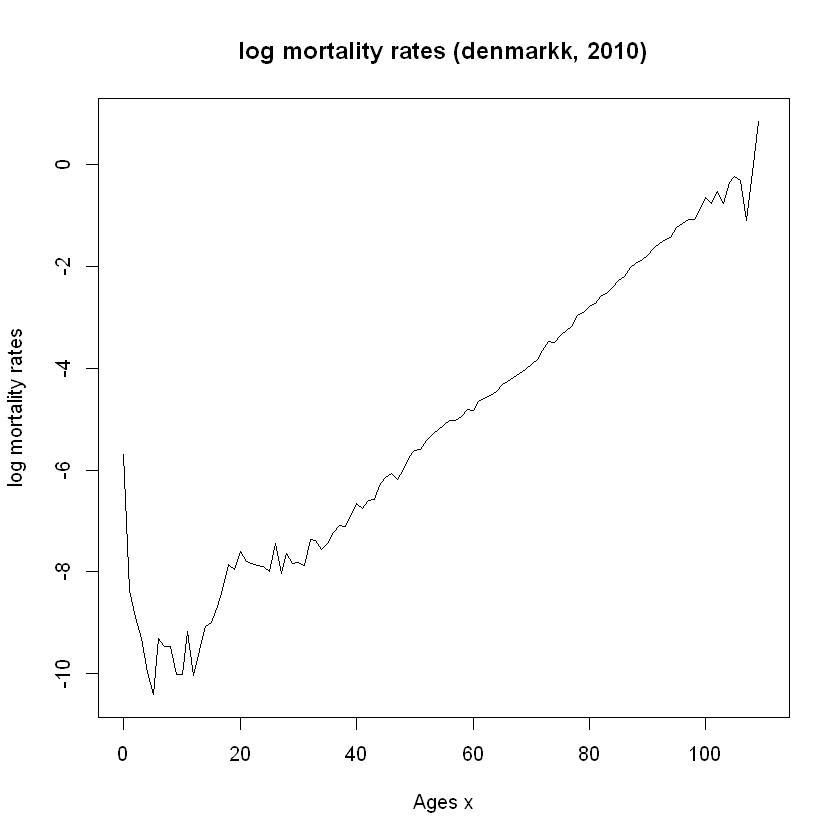

In [39]:
plot(DenmarkMT$age, log(DenmarkMT$rate$total[,"2010"]), main ='log mortality rates (denmarkk, 2010)',
     xlab = "Ages x", ylab = "log mortality rates", type = "l")

Question 7 : Présenter la procédure par défaut de projection des taux mortalité implémentée dans StMoMo pour les
deux modèles. 

Dans la famille des modèles de mortalité stochastique généralisés par âge, période et cohorte, la dynamique de la mortalité est
les indices de période κt (i), i = 1, ..., N et l’indice de cohorte γt x. Par conséquent, les prévisions
et la simulation des taux de mortalité nécessite la modélisation de ces indices à l’aide de séries chronologiques
techniques.
Pour les indices de période, nous envisageons deux approches de modélisation alternatives. Une première possibilité est
d’utiliser l’approche standard dans la documentation actuarielle et de supposer que les indices de période suivent une multivariée
marche aléatoire avec dérive.

Question 8 : projeter les taux de mortalité à l’aide de la fonction forecast.

StMoMo: Start fitting with gnm
Initialising
Running start-up iterations..
Running main iterations........
Done
StMoMo: Finish fitting with gnm
StMoMo: Start fitting with gnm
Initialising
Running start-up iterations..
Running main iterations........
Done
StMoMo: Finish fitting with gnm


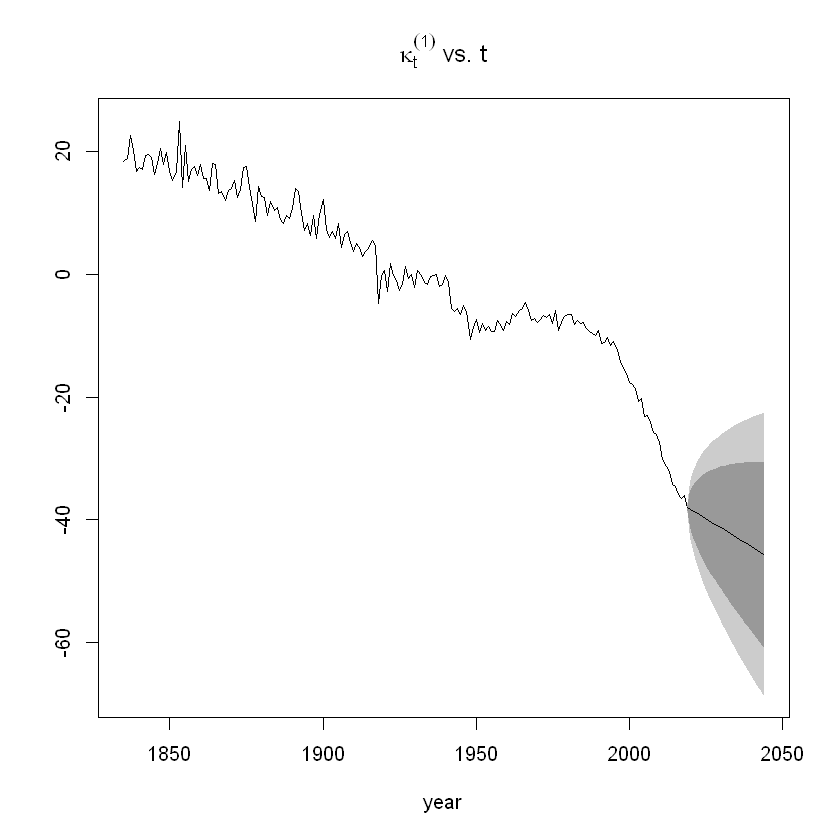

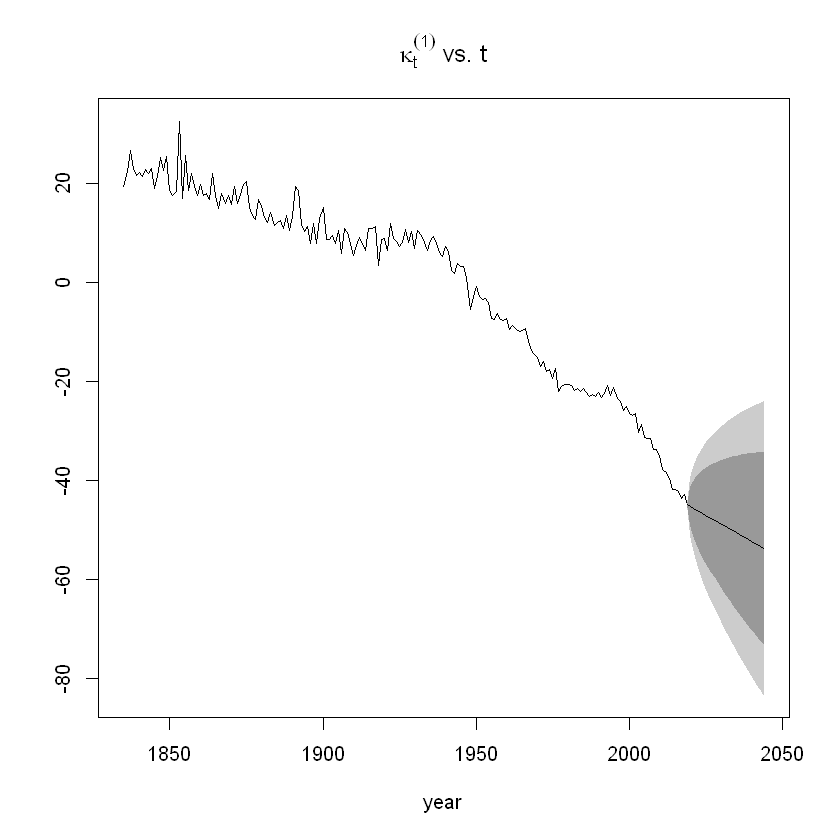

In [16]:
denmarkMFit<- fit(LC, data = denmarkMMoMo, ages.fit = age, years.fit = annees )
denmarkMForcast <- forecast(denmarkMFit , h = 25, method=mean)
plot(denmarkMForcast, only.kt=TRUE )
denmarkFFit<- fit(LC, data = denmarkFMoMo, ages.fit = age, years.fit = annees )
denmarkFForcast <- forecast(denmarkFFit , h = 25, method=mean)
plot(denmarkFForcast, only.kt=TRUE )

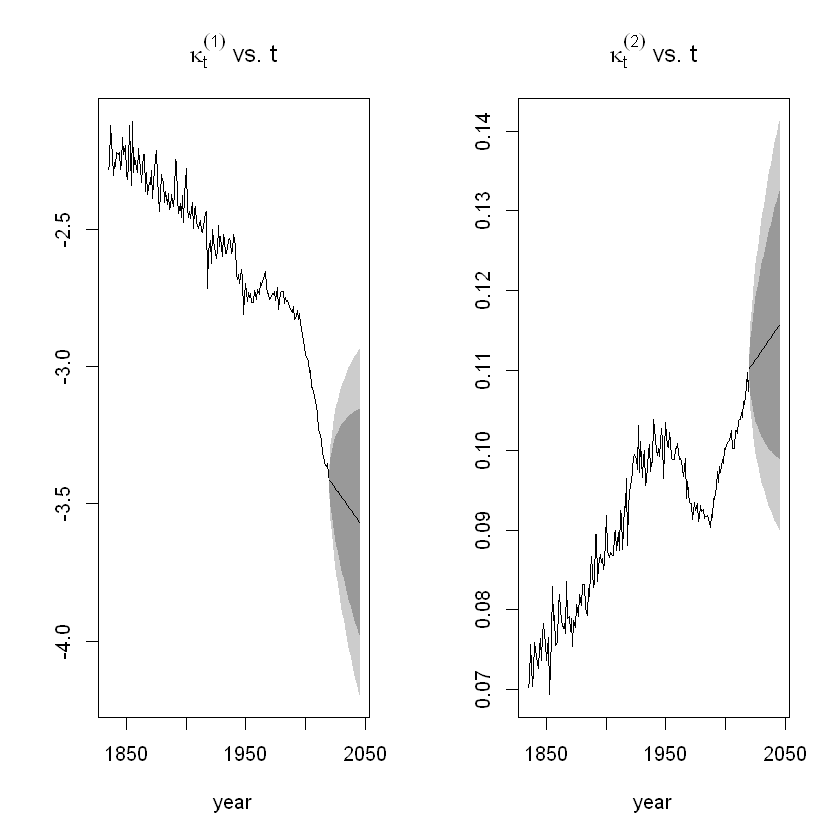

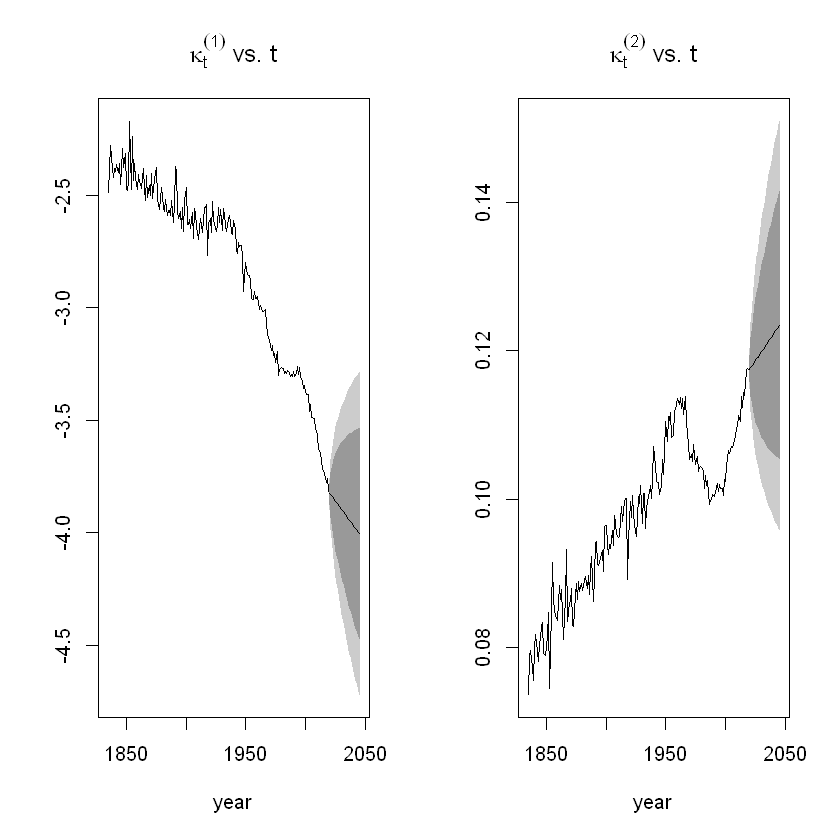

In [17]:
denmarkForcastMCBD <- forecast(CBDMfit , h = 25, method=mean)
plot(denmarkForcastMCBD, only.kt=TRUE)
denmarkForcastFCBD <- forecast(CBDFfit , h = 25, method=mean)
plot(denmarkForcastFCBD, only.kt=TRUE)